In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df_por = pd.read_csv("d://student-por.csv",sep=';')

In [81]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [82]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
            i=0
        elif (i < 19):
            i=1
        else:
            i=2
        new_age.append(i)
    return new_age

In [9]:
df_por['age']=age(df_por['age'])

<AxesSubplot:xlabel='age', ylabel='G3'>

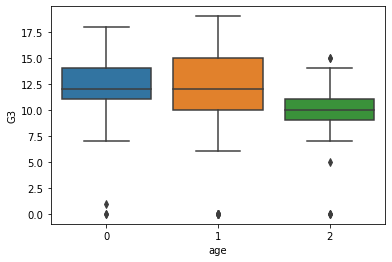

In [10]:
sns.boxplot(x='age',y='G3',data=df_por)

Students of age (19-20) mostly have a score around 10.0

In [11]:
df_por['school']=pd.get_dummies(df_por['school'],drop_first=True)

<AxesSubplot:xlabel='school', ylabel='G3'>

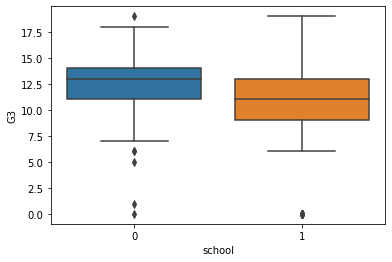

In [12]:
sns.boxplot(x='school',y='G3',data=df_por)      # 0 = GP and 1 = MS

Students at GP perform better than students at MS

In [13]:
df_por['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='G3'>

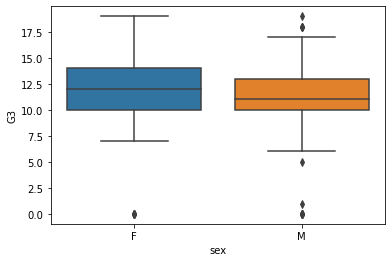

In [14]:
sns.boxplot(x='sex',y='G3',data=df_por)

Female students have better performance in school than the male students. 
Since the mean score of girls is more than boys and the maximum marks also.(Though there are some outliers)

In [15]:
df_por['sex'] = pd.get_dummies(df_por['sex'],drop_first=True)

In [16]:
df_por['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

<AxesSubplot:xlabel='address', ylabel='G3'>

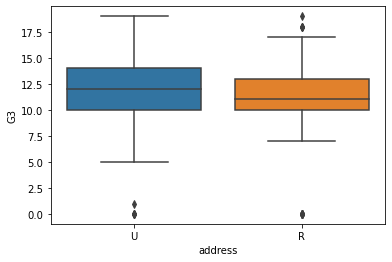

In [17]:
sns.boxplot(x='address',y='G3',data=df_por)

Urban students are distriuted widely in terms of scores,  whereas rural students are clustered between 7 and 17

In [18]:
df_por['address'] = pd.get_dummies(df_por['address'],drop_first=True)

In [21]:
df_por['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

<AxesSubplot:xlabel='famsize', ylabel='G3'>

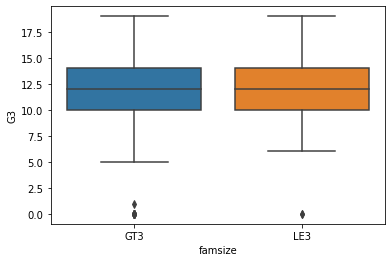

In [22]:
sns.boxplot(x='famsize',y='G3',data=df_por)

Since the family size of the students doesn't tell much about their scores, we'll drop this attribute.

In [23]:
df_por.drop('famsize',axis=1,inplace=True)

In [24]:
df_por['Pstatus'].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

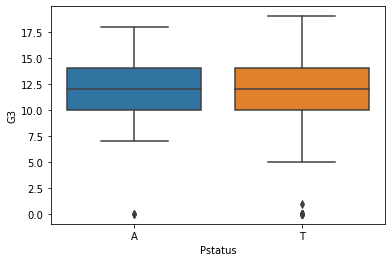

In [25]:
sns.boxplot(x='Pstatus',y='G3',data=df_por)

Parent's status of living together or apart also affect much the scores, so we'll drop this.

In [26]:
df_por.drop('Pstatus',axis=1,inplace=True)

<AxesSubplot:xlabel='Medu', ylabel='G3'>

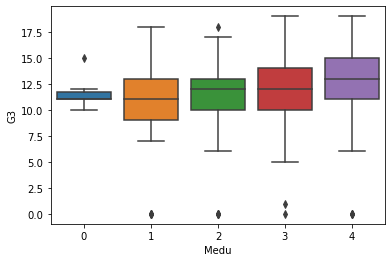

In [27]:
sns.boxplot(x='Medu',y='G3',data=df_por)

Students whose mother have completed higher education tend to score more than others

In [28]:
df_por['Fedu'].value_counts()

2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

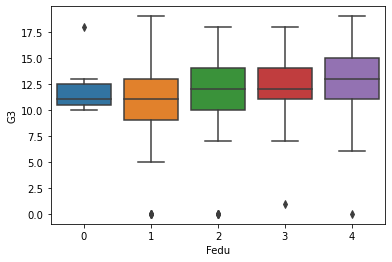

In [29]:
sns.boxplot(x='Fedu',y='G3',data=df_por)

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

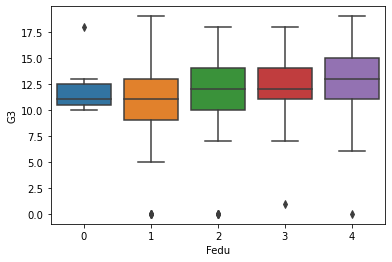

In [30]:
sns.boxplot(x='Fedu',y='G3',data=df_por)

Students whose fathers have completed higher education have slightly better chance of performing well in exams.

In [31]:
df_por['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

<AxesSubplot:xlabel='Mjob', ylabel='G3'>

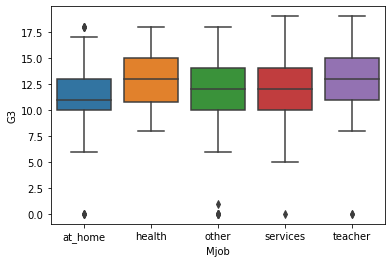

In [32]:
sns.boxplot(x='Mjob',y='G3',data=df_por)

<AxesSubplot:xlabel='Fjob', ylabel='G3'>

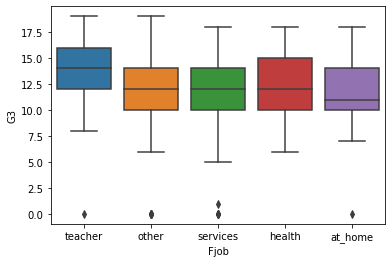

In [33]:
sns.boxplot(x='Fjob',y='G3',data=df_por)

Students whose parents are teachers ,score better in exams.

I will convert these categories into dummy variables later

In [34]:
df_por['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='G3'>

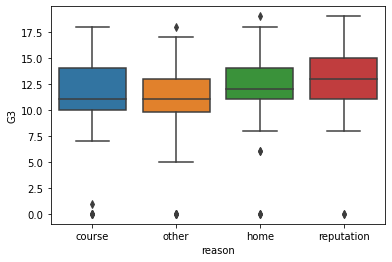

In [36]:
sns.boxplot(x='reason',y='G3',data=df_por)

Students who choose their school by looking at it's reputation ,tend to score better

In [37]:
df_por['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

<AxesSubplot:xlabel='guardian', ylabel='G3'>

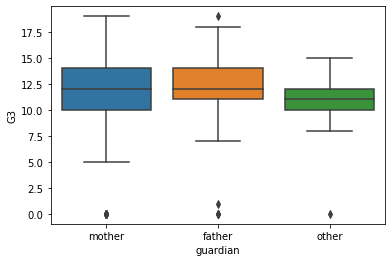

In [38]:
sns.boxplot(x='guardian',y='G3',data=df_por)

student with guardian's other than father or mother ,scored less than remaining.

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

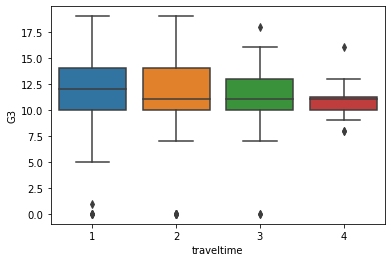

In [39]:
sns.boxplot(x='traveltime',y='G3',data=df_por)

Travel time to school doesn't affect much

In [40]:
df_por.drop('traveltime',axis=1,inplace=True)

In [41]:
df_por['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

<AxesSubplot:xlabel='studytime', ylabel='G3'>

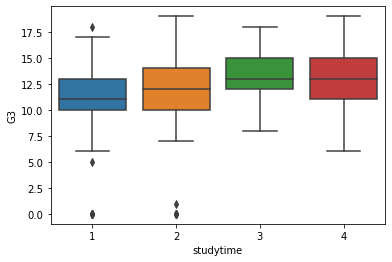

In [42]:
sns.boxplot(x='studytime',y='G3',data=df_por)

It's pretty clear that if you study for more time,your result will improve.
But we see a little downfall in students who study more than 10 hours , maybe because they are not resting.

In [43]:
df_por['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

<AxesSubplot:xlabel='failures', ylabel='G3'>

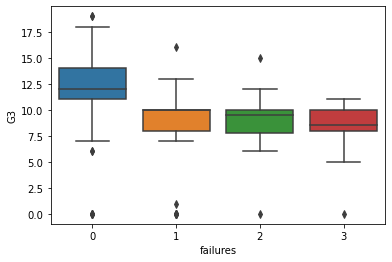

In [44]:
sns.boxplot(x='failures',y='G3',data=df_por)

Student's who do not have any past failures record score more. 

<AxesSubplot:xlabel='schoolsup', ylabel='G3'>

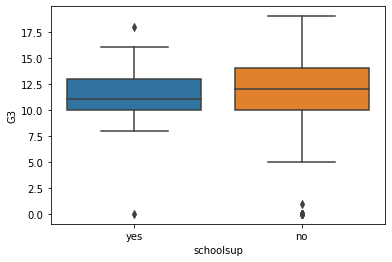

In [46]:
sns.boxplot(x='schoolsup',y='G3',data=df_por)

Student's with school support have much higher chance of passing the exam.

In [47]:
df_por['schoolsup']=pd.get_dummies(df_por['schoolsup'],drop_first=True)

<AxesSubplot:xlabel='famsup', ylabel='G3'>

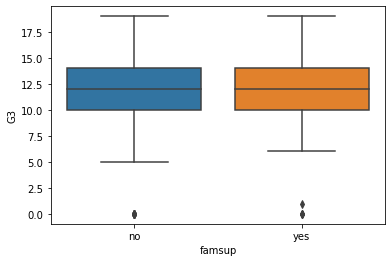

In [49]:
sns.boxplot(x='famsup',y='G3',data=df_por)

Suprisingly there's almost no difference in student's grades whether their family supports them or not in education.

In [50]:
df_por.drop('famsup',axis=1,inplace=True)

In [51]:
df_por['activities'].value_counts()

no     334
yes    315
Name: activities, dtype: int64

<AxesSubplot:xlabel='activities', ylabel='G3'>

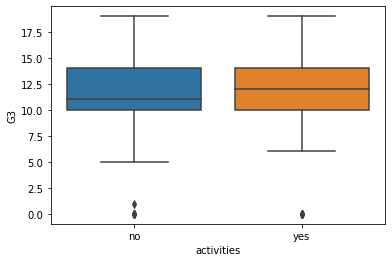

In [53]:
sns.boxplot(x='activities',y='G3',data=df_por)

In [54]:
df_por.drop('activities',axis=1,inplace=True)

Since there's not much difference in scores.
We'll drop this also.

In [55]:
df_por['higher'].value_counts()

yes    580
no      69
Name: higher, dtype: int64

<AxesSubplot:xlabel='higher', ylabel='G3'>

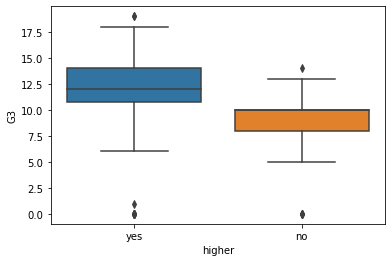

In [57]:
sns.boxplot(x='higher',y='G3',data=df_por)

The students who don't want to take higher studies ,have a poor performance .

In [58]:
df_por['higher']=pd.get_dummies(df_por['higher'],drop_first=True)

In [59]:
df_por['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [60]:
df_por['internet']=pd.get_dummies(df_por['internet'],drop_first=True)

<AxesSubplot:xlabel='internet', ylabel='G3'>

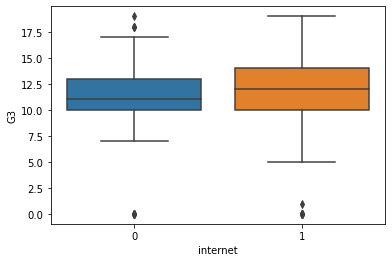

In [61]:
sns.boxplot(x='internet',y='G3',data=df_por)

Students who do not have internet access at home tend to score average marks. 

In [62]:
df_por['health'].value_counts()

5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64

<AxesSubplot:xlabel='health', ylabel='G3'>

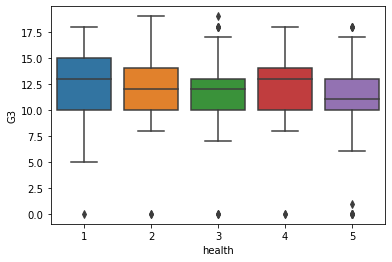

In [64]:
sns.boxplot(x='health',y='G3',data=df_por)

There's not much difference in the scores with respect to student's health

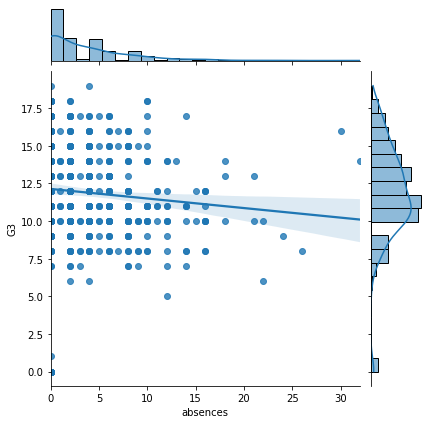

In [65]:
sns.jointplot(x='absences',y='G3',data=df_por,kind="reg")

In [66]:
def absences(n):
    new=[]
    for i in n:    
        if (i <= 10):
            i=0
        elif(i <= 20):
            i=1
        else:
            i=2
        new.append(i)
    return new

In [67]:
df_por['absences']=absences(df_por['absences'])

In [68]:
df_por['absences'].value_counts()

0    600
1     41
2      8
Name: absences, dtype: int64

<AxesSubplot:xlabel='absences', ylabel='G3'>

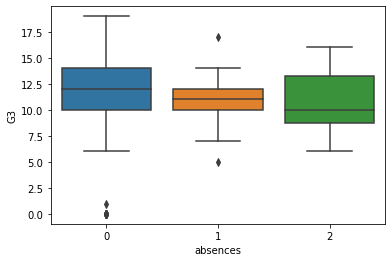

In [69]:
sns.boxplot(x='absences',y='G3',data=df_por)

With increase in absences , the performance of the students decrease

In [70]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     649 non-null    uint8 
 1   sex        649 non-null    uint8 
 2   age        649 non-null    int64 
 3   address    649 non-null    uint8 
 4   Medu       649 non-null    int64 
 5   Fedu       649 non-null    int64 
 6   Mjob       649 non-null    object
 7   Fjob       649 non-null    object
 8   reason     649 non-null    object
 9   guardian   649 non-null    object
 10  studytime  649 non-null    int64 
 11  failures   649 non-null    int64 
 12  schoolsup  649 non-null    uint8 
 13  paid       649 non-null    object
 14  nursery    649 non-null    object
 15  higher     649 non-null    uint8 
 16  internet   649 non-null    uint8 
 17  romantic   649 non-null    object
 18  famrel     649 non-null    int64 
 19  freetime   649 non-null    int64 
 20  goout      649 non-null    int64

In [71]:
df_por = pd.get_dummies(df_por,drop_first=True)

In [72]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             649 non-null    uint8
 1   sex                649 non-null    uint8
 2   age                649 non-null    int64
 3   address            649 non-null    uint8
 4   Medu               649 non-null    int64
 5   Fedu               649 non-null    int64
 6   studytime          649 non-null    int64
 7   failures           649 non-null    int64
 8   schoolsup          649 non-null    uint8
 9   higher             649 non-null    uint8
 10  internet           649 non-null    uint8
 11  famrel             649 non-null    int64
 12  freetime           649 non-null    int64
 13  goout              649 non-null    int64
 14  Dalc               649 non-null    int64
 15  Walc               649 non-null    int64
 16  health             649 non-null    int64
 17  absences        

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
def result(score):
    new=[]
    for i in score:
        if (i<8):
            i=0     #Student fails
        else:
            i=1     #student passes
        new.append(i)
    return new

In [75]:
df_por['G3']=result(df_por['G3'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_por.drop(['G1','G2','G3'],axis=1), df_por['G3'], test_size=0.33, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()

In [128]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
model.score(X_test,y_test)

0.95348837209302328